In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt

[Date time analysis guide](https://jakevdp.github.io/PythonDataScienceHandbook/03.11-working-with-time-series.html)

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [99]:
vlc = pd.read_csv('Datasets/Volcano/vlc.csv')

In [100]:
vlc

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,8300 BCE,50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,4040 BCE,45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
2,210030,Olot Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Evidence Credible,Unknown,42.170,2.530,893,Trachybasalt / Tephrite Basanite,Intraplate / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,3600 BCE,38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282 CE,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016 CE,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1504,390140,Protector Seamounts,United Kingdom,Antarctica,Submarine,Eruption Observed,1962 CE,-55.912,-28.167,-55,Rhyolite,Subduction Zone / Oceanic Crust (< 15 km)
1505,390812,"Rittmann, Mount",Antarctica,Antarctica,Shield,Unrest / Pleistocene,Unknown,-73.450,165.500,2600,NaN,Intraplate / Continental Crust (>25 km)
1506,390829,James Ross Island,Antarctica,Antarctica,Shield,Evidence Credible,Unknown,-64.150,-57.750,1630,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)


In [101]:
vlc['Last Known Eruption']

0       8300 BCE
1       4040 BCE
2        Unknown
3       3600 BCE
4        1282 CE
          ...   
1503     2016 CE
1504     1962 CE
1505     Unknown
1506     Unknown
1507     Unknown
Name: Last Known Eruption, Length: 1508, dtype: object

In [102]:
vlc.groupby('Last Known Eruption').Number.count()

Last Known Eruption
0 CE           1
1000 CE        1
1007 CE        1
104 BCE        1
10450 BCE      1
            ... 
950 CE         6
9540 BCE       1
960 BCE        1
960 CE         1
Unknown      637
Name: Number, Length: 399, dtype: int64

In [103]:
vlc = vlc[vlc['Last Known Eruption'] != 'Unknown']

In [104]:
vlc.groupby('Last Known Eruption').Name.count()

Last Known Eruption
0 CE         1
1000 CE      1
1007 CE      1
104 BCE      1
10450 BCE    1
            ..
950 BCE      1
950 CE       6
9540 BCE     1
960 BCE      1
960 CE       1
Name: Name, Length: 398, dtype: int64

In [105]:
vlc.shape

(871, 12)

In [106]:
vlc['Last Known Eruption'].isna().sum()

0

In [107]:
!pip install flexidate

In [108]:
from flexidate import parse

In [109]:
fd_ce = parse('2016 CE')

In [110]:
fd_ce

<class 'flexidate.FlexiDate'> 2016

In [111]:
fd_ce.year

'2016'

In [112]:
vlc['Last Known Eruption']

0       8300 BCE
1       4040 BCE
3       3600 BCE
4        1282 CE
5        104 BCE
          ...   
1498     2007 CE
1499     2015 CE
1500     1911 CE
1503     2016 CE
1504     1962 CE
Name: Last Known Eruption, Length: 871, dtype: object

In [113]:
vlc.update("'"+vlc['Last Known Eruption'].astype(str)+"'")

In [114]:
vlc

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
0,210010,West Eifel Volcanic Field,Germany,Mediterranean and Western Asia,Maar(s),Eruption Dated,'8300 BCE',50.170,6.850,600,Foidite,Rift Zone / Continental Crust (>25 km)
1,210020,Chaine des Puys,France,Mediterranean and Western Asia,Lava dome(s),Eruption Dated,'4040 BCE',45.775,2.970,1464,Basalt / Picro-Basalt,Rift Zone / Continental Crust (>25 km)
3,210040,Calatrava Volcanic Field,Spain,Mediterranean and Western Asia,Pyroclastic cone(s),Eruption Dated,'3600 BCE',38.870,-4.020,1117,Basalt / Picro-Basalt,Intraplate / Continental Crust (>25 km)
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,'1282 CE',43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
5,211003,Vulsini,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,'104 BCE',42.600,11.930,800,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,390081,Montagu Island,United Kingdom,Antarctica,Shield,Eruption Observed,'2007 CE',-58.445,-26.374,1370,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1499,390090,Saunders,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,'2015 CE',-57.800,-26.483,843,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1500,390100,Candlemas Island,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,'1911 CE',-57.080,-26.670,550,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,'2016 CE',-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)


In [115]:
lke = vlc['Last Known Eruption'].values

In [116]:
parsed_yrs = [parse(y).year for y in lke]

In [117]:
parsed_yrs

['-8300',
 '-4040',
 '-3600',
 '1282',
 '-0104',
 '1538',
 '1944',
 '1302',
 '-8040',
 '2016',
 '1230',
 '1890',
 '2016',
 '1867',
 '1891',
 '-1050',
 '-0258',
 '0140',
 '1950',
 '1888',
 '-2080',
 '-6880',
 '1650',
 '1855',
 '1840',
 '2050',
 '-0750',
 '-1900',
 '-2000',
 '-0778',
 '-3000',
 '2008',
 '2013',
 '2011',
 '2008',
 '2016',
 '1861',
 '2012',
 '1915',
 '2005',
 '2009',
 '1928',
 '1978',
 '1631',
 '1820',
 '1820',
 '1900',
 '-2050',
 '1888',
 '1921',
 '-6550',
 '1910',
 '-5050',
 '-7550',
 '-6050',
 '1770',
 '1863',
 '2013',
 '1855',
 '1910',
 '-10450',
 '1450',
 '1250',
 '1800',
 '-2120',
 '2015',
 '2016',
 '-8050',
 '1957',
 '1923',
 '2000',
 '-2000',
 '-2950',
 '0850',
 '1222',
 '1850',
 '0640',
 '1000',
 '0650',
 '1256',
 '1810',
 '0500',
 '-1200',
 '1937',
 '1253',
 '-5350',
 '-2050',
 '2007',
 '-6050',
 '2016',
 '1995',
 '1793',
 '2016',
 '2005',
 '2004',
 '0400',
 '1350',
 '-5060',
 '1854',
 '2016',
 '1981',
 '1180',
 '0180',
 '0260',
 '2012',
 '2007',
 '2008',
 '1360'

In [118]:
vlc['Last Known Eruption'] = parsed_yrs

In [119]:
vlc = vlc[vlc['Last Known Eruption'] != '']

In [120]:
vlc['Last Known Eruption'] = vlc['Last Known Eruption'].astype(int)

In [121]:
vlc['Last Known Eruption']

0      -8300
1      -4040
3      -3600
4       1282
5       -104
        ... 
1498    2007
1499    2015
1500    1911
1503    2016
1504    1962
Name: Last Known Eruption, Length: 870, dtype: int32

In [122]:
vlc = vlc[vlc['Last Known Eruption'] > 0]

In [123]:
vlc.shape

(696, 12)

In [124]:
vlc

,Number,Name,Country,Region,Type,Activity Evidence,Last Known Eruption,Latitude,Longitude,Elevation (Meters),Dominant Rock Type,Tectonic Setting
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
7,211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,1538,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
8,211020,Vesuvius,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,1944,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction Zone / Continental Crust (>25 km)
9,211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302,40.730,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
11,211040,Stromboli,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,2016,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,390081,Montagu Island,United Kingdom,Antarctica,Shield,Eruption Observed,2007,-58.445,-26.374,1370,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1499,390090,Saunders,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2015,-57.800,-26.483,843,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1500,390100,Candlemas Island,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,1911,-57.080,-26.670,550,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)


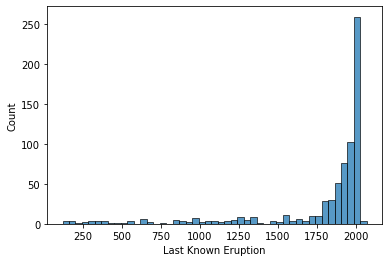

In [125]:
sns.histplot(vlc['Last Known Eruption']);

In [126]:
vlc.Region.unique()

array(['Mediterranean and Western Asia', 'Africa and Red Sea',
       'Middle East and Indian Ocean', 'New Zealand to Fiji',
       'Melanesia and Australia', 'Indonesia', 'Philippines and SE Asia',
       'Japan, Taiwan, Marianas', 'Kuril Islands',
       'Kamchatka and Mainland Asia', 'Alaska', 'Canada and Western USA',
       'Hawaii and Pacific Ocean', 'México and Central America',
       'South America', 'West Indies', 'Iceland and Arctic Ocean',
       'Atlantic Ocean', 'Antarctica'], dtype=object)

In [127]:
vlc.Country.unique()

array(['Italy', 'Greece', 'Turkey', 'Russia', 'Yemen', 'Ethiopia',
       'Eritrea', 'Ethiopia-Djibouti', 'Djibouti', 'Kenya', 'Tanzania',
       'DR Congo', 'DR Congo-Rwanda', 'Equatorial Guinea', 'Cameroon',
       'Sudan', 'Syria', 'Syria-Jordan-Saudi Arabia', 'Saudi Arabia',
       'Comoros', 'France', 'Australia', 'South Africa', 'New Zealand',
       'Tonga', 'United States', 'Samoa', 'Fiji', 'Papua New Guinea',
       'Solomon Islands', 'Vanuatu', 'India', 'Indonesia', 'Philippines',
       'China', 'Vietnam', 'Taiwan', 'Japan',
       'Japan - administered by Russia', 'China-North Korea',
       'South Korea', 'Canada', 'Undersea Features', 'Mexico',
       'Mexico-Guatemala', 'Guatemala', 'El Salvador', 'Nicaragua',
       'Costa Rica', 'Panama', 'Colombia', 'Colombia-Ecuador', 'Ecuador',
       'Peru', 'Chile-Bolivia', 'Chile', 'Chile-Argentina', 'Argentina',
       'Netherlands', 'Saint Kitts and Nevis', 'United Kingdom',
       'Dominica', 'Saint Lucia', 'Saint Vincent and 

In [128]:
regional_distribution = vlc.groupby('Region').size()

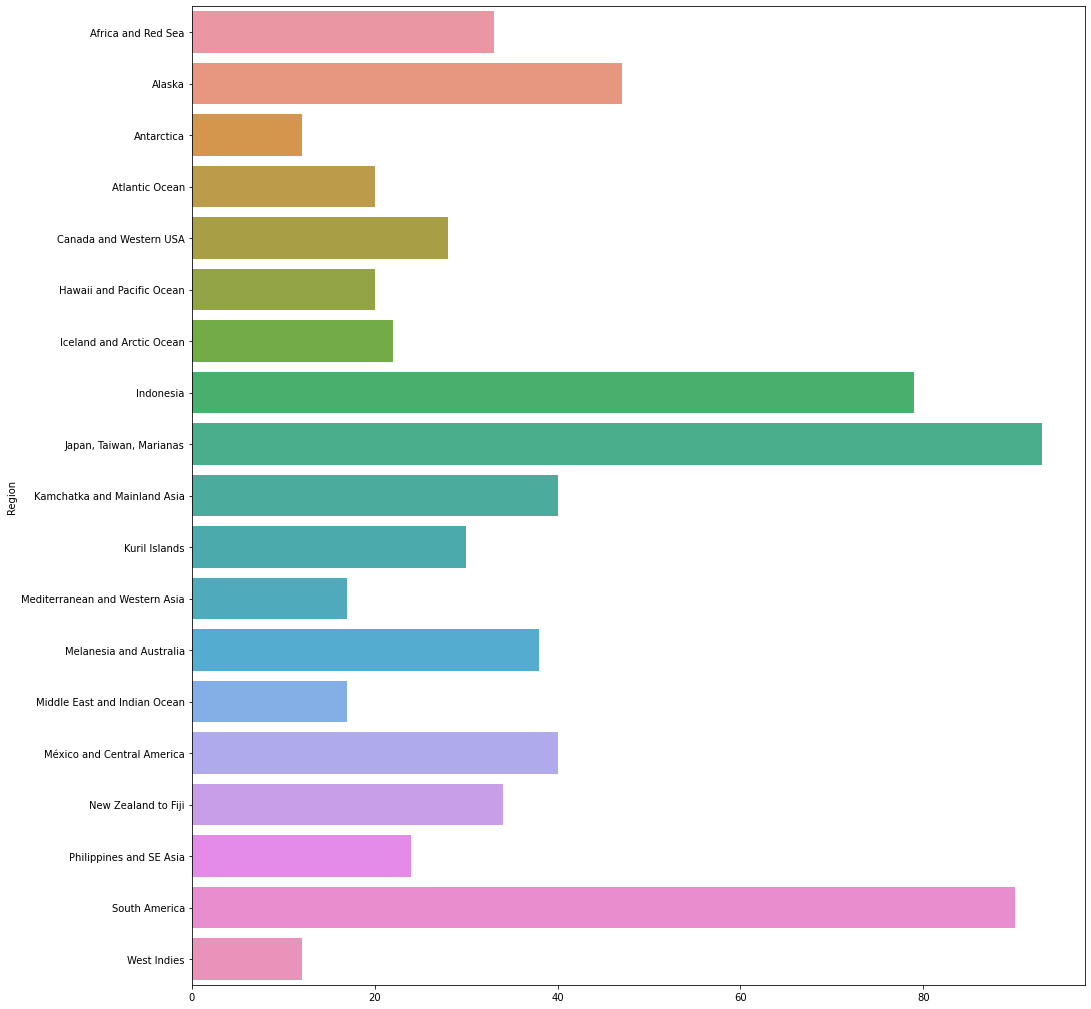

In [129]:
plt.figure(figsize=(16,18))
sns.barplot(y=regional_distribution.index, x=regional_distribution.values);

In [130]:
vlc.columns

Index(['Number', 'Name', 'Country', 'Region', 'Type', 'Activity Evidence',
       'Last Known Eruption', 'Latitude', 'Longitude', 'Elevation (Meters)',
       'Dominant Rock Type', 'Tectonic Setting'],
      dtype='object')

In [131]:
vlc.columns  = ['Number', 'Name', 'Country', 'Region', 'Type', 'Activity_Evidence',
       'Last_Known_Eruption', 'Latitude', 'Longitude', 'Elevation',
       'Dominant_Rock_Type', 'Tectonic_Setting']

In [132]:
vlc[:5]

,Number,Name,Country,Region,Type,Activity_Evidence,Last_Known_Eruption,Latitude,Longitude,Elevation,Dominant_Rock_Type,Tectonic_Setting
4,211001,Larderello,Italy,Mediterranean and Western Asia,Explosion crater(s),Eruption Observed,1282,43.250,10.870,500,No Data,Subduction Zone / Continental Crust (>25 km)
7,211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,1538,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
8,211020,Vesuvius,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,1944,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction Zone / Continental Crust (>25 km)
9,211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302,40.730,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
11,211040,Stromboli,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,2016,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction Zone / Continental Crust (>25 km)


In [133]:
vlc.groupby('Region').Elevation.agg([min, max, 'mean'])

,min,max,mean
Region,,,
Africa and Red Sea,-48,4565,1837.393939
Alaska,91,5005,1721.000000
Antarctica,-55,3794,1165.083333
Atlantic Ocean,-4200,3715,976.650000
Canada and Western USA,-40,4392,2609.821429
Hawaii and Pacific Ocean,-3000,4170,-955.500000
Iceland and Arctic Ocean,-3800,2085,888.409091
Indonesia,-5,3800,1941.974684
"Japan, Taiwan, Marianas",-4100,3776,1026.569892


In [134]:
regional_elevation = vlc.groupby('Region').Elevation.agg([min, max, 'mean'])

In [135]:
vlc.Type.unique()

array(['Explosion crater(s)', 'Caldera', 'Stratovolcano', 'Complex',
       'Stratovolcano(es)', 'Submarine', 'Shield', 'Shield(s)',
       'Fissure vent(s)', 'Caldera(s)', 'Pyroclastic cone',
       'Pyroclastic cone(s)', 'Volcanic field', 'Lava dome(s)',
       'Pyroclastic shield', 'Lava cone', 'Stratovolcano?', 'Lava dome',
       'Compound', 'Complex(es)', 'Cone(s)', 'Maar', 'Maar(s)',
       'Subglacial', 'Crater rows', 'Fissure vent'], dtype=object)

In [136]:
vlc.groupby('Type').size()[:5]

Type
Caldera        48
Caldera(s)      6
Complex        32
Complex(es)     1
Compound        5
dtype: int64

In [138]:
vlc.groupby('Type').Elevation.agg([min, max, 'mean'])[:5]

,min,max,mean
Type,,,
Caldera,-2,5323,1284.458333
Caldera(s),897,2181,1373.000000
Complex,212,4276,1743.281250
Complex(es),1158,1158,1158.000000
Compound,228,5790,2832.200000


In [139]:
Type_elevation = vlc.groupby('Type').Elevation.agg([min, max, 'mean'])

In [140]:
vlc['Dominant_Rock_Type'].unique()

array(['No Data', 'Trachyte / Trachydacite',
       'Phono-tephrite /  Tephri-phonolite',
       'Trachyandesite / Basaltic Trachyandesite', 'Rhyolite',
       'Trachybasalt / Tephrite Basanite', 'Dacite',
       'Basalt / Picro-Basalt', 'Andesite / Basaltic Andesite', 'Foidite',
       'Phonolite', nan], dtype=object)

In [141]:
vlc_2 = vlc[vlc['Dominant_Rock_Type']!='No Data']

In [142]:
vlc_2.columns = ['Number', 'Name', 'Country', 'Region', 'Type', 'Activity_Evidence',
       'Last_Known_Eruption', 'Latitude', 'Longitude', 'Elevation',
       'DRT', 'Tectonic_Setting']

In [143]:
vlc_2

,Number,Name,Country,Region,Type,Activity_Evidence,Last_Known_Eruption,Latitude,Longitude,Elevation,DRT,Tectonic_Setting
7,211010,Campi Flegrei,Italy,Mediterranean and Western Asia,Caldera,Eruption Observed,1538,40.827,14.139,458,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
8,211020,Vesuvius,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,1944,40.821,14.426,1281,Phono-tephrite / Tephri-phonolite,Subduction Zone / Continental Crust (>25 km)
9,211030,Ischia,Italy,Mediterranean and Western Asia,Complex,Eruption Observed,1302,40.730,13.897,789,Trachyte / Trachydacite,Subduction Zone / Continental Crust (>25 km)
11,211040,Stromboli,Italy,Mediterranean and Western Asia,Stratovolcano,Eruption Observed,2016,38.789,15.213,924,Trachyandesite / Basaltic Trachyandesite,Subduction Zone / Continental Crust (>25 km)
13,211042,Lipari,Italy,Mediterranean and Western Asia,Stratovolcano(es),Eruption Dated,1230,38.490,14.933,590,Rhyolite,Subduction Zone / Continental Crust (>25 km)
...,...,...,...,...,...,...,...,...,...,...,...,...
1498,390081,Montagu Island,United Kingdom,Antarctica,Shield,Eruption Observed,2007,-58.445,-26.374,1370,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1499,390090,Saunders,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2015,-57.800,-26.483,843,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1500,390100,Candlemas Island,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,1911,-57.080,-26.670,550,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)
1503,390130,Zavodovski,United Kingdom,Antarctica,Stratovolcano,Eruption Observed,2016,-56.300,-27.570,551,Basalt / Picro-Basalt,Subduction Zone / Oceanic Crust (< 15 km)


In [144]:
vlc_2.groupby('DRT').size()

DRT
Andesite / Basaltic Andesite                329
Basalt / Picro-Basalt                       201
Dacite                                       46
Foidite                                       3
Phono-tephrite /  Tephri-phonolite            1
Phonolite                                     4
Rhyolite                                     27
Trachyandesite / Basaltic Trachyandesite     14
Trachybasalt / Tephrite Basanite             29
Trachyte / Trachydacite                      21
dtype: int64

In [145]:
vlc_2.groupby('DRT').Elevation.agg([min, max, 'mean'])

,min,max,mean
DRT,,,
Andesite / Basaltic Andesite,-1174,6336,2092.215805
Basalt / Picro-Basalt,-3000,4754,1168.716418
Dacite,-980,6879,2325.782609
Foidite,2829,3470,3087.000000
Phono-tephrite / Tephri-phonolite,1281,1281,1281.000000
Phonolite,230,4565,3076.000000
Rhyolite,-200,4643,1216.740741
Trachyandesite / Basaltic Trachyandesite,-107,5323,1730.571429
Trachybasalt / Tephrite Basanite,-1743,4095,1584.620690


In [147]:
DRT_distribution = vlc_2.groupby('DRT').size()
DRT_elevation = vlc_2.groupby('DRT').Elevation.agg([min, max, 'mean'])
Type_distribution = vlc.groupby('Type').size()
Type_elevation = vlc.groupby('Type').Elevation.agg([min, max, 'mean'])
regional_distribution = vlc.groupby('Region').size()
regional_elevation = vlc.groupby('Region').Elevation.agg([min, max, 'mean'])

In [148]:
DRT_distribution.to_csv('Datasets/Volcano/DRT1.csv')
DRT_elevation.to_csv('Datasets/Volcano/DRT2.csv')
Type_distribution.to_csv('Datasets/Volcano/Type1.csv')
Type_elevation.to_csv('Datasets/Volcano/Type2.csv')
regional_distribution.to_csv('Datasets/Volcano/RD1.csv')
regional_elevation.to_csv('Datasets/Volcano/RD2.csv')

In [155]:
vlc.to_csv('Datasets/Volcano/vlc_filtered.csv')

In [159]:
vlc[vlc['Last_Known_Eruption'] == 2050]

,Number,Name,Country,Region,Type,Activity_Evidence,Last_Known_Eruption,Latitude,Longitude,Elevation,Dominant_Rock_Type,Tectonic_Setting
36,214010,Elbrus,Russia,Mediterranean and Western Asia,Stratovolcano,Eruption Dated,2050,43.351,42.442,5642,Dacite,Intraplate / Continental Crust (>25 km)
